In [84]:
import pandas as pd
import altair as alt
import numpy as np

In [5]:
df = pd.read_csv('../rvino88-1976-to-2015-nba-draft-data/data/1976_to_2015_draftees_edit2.csv')

In [6]:
df.shape

(3961, 35)

In [7]:
df.head()

column_a           player  all_nba  all_star  draft_yr  pk team  \
0         1    Robert Parish        2         9      1976   8  GSW   
1         2     Sonny Parker        0         0      1976  17  GSW   
2         3  Marshall Rogers        0         0      1976  34  GSW   
3         4      Jeff Fosnes        0         0      1976  68  GSW   
4         5        Carl Bird        0         0      1976  86  GSW   

                            college  yrs  games  ...  executive  \
0    Centenary College of Louisiana   21   1611  ...  Al Attles   
1              Texas A&M University    6    452  ...  Al Attles   
2  University of Texas-Pan American    1     26  ...  Al Attles   
3             Vanderbilt University    0      0  ...  Al Attles   
4          University of California    0      0  ...  Al Attles   

                         tenure  exec_id  exec_draft_exp  attend_college  \
0  3641 days 00:00:00.000000000        1               1            True   
1  3641 days 00:00:00.000000000        1               1            True   
2  3641 days 00:00:00.000000000        1               1            True   
3  3641 days 00:00:00.000000000        1               1            True   
4  3641 days 00:00:00.000000000        1               1            True   

   first_year  second_year  third_year  fourth_year  fifth_year  
0       False        False       False        False       False  
1       False        False       False        False       False  
2       False        False       False        False       False  
3       False        False       False        False       False  
4       False        False       False        False       False  

[5 rows x 35 columns]

In [8]:
df['retire_yr'] = df['draft_yr'] + df['yrs']

In [9]:
target = 'player'
features = ['all_nba', 'all_star', 'draft_yr', 'pk', 'team',
       'college', 'yrs', 'games', 'minutes_played', 'pts', 'trb', 'ast',
       'fg_percentage', 'tp_percentage', 'ft_percentage', 'minutes_per_game',
       'points_per_game', 'trb_per_game', 'assits_per_game', 'win_share',
       'ws_per_game', 'bpm', 'vorp', 'exec_id',
       'exec_draft_exp', 'attend_college', 'first_year', 'second_year',
       'third_year', 'fourth_year', 'fifth_year', 'retire_yr']

In [10]:
df.describe(exclude='number')

player  team college        executive  \
count            3961  3961    3961             3961   
unique           3905    30     489              162   
top     Charles Jones   POR       0  Jerry Colangelo   
freq                4   184     296              131   

                              tenure attend_college first_year second_year  \
count                           3961           3961       3961        3961   
unique                           214              2          2           2   
top     9550 days 00:00:00.000000000           True      False       False   
freq                             131           3665       3901        3901   

       third_year fourth_year fifth_year  
count        3961        3961       3961  
unique          2           2          2  
top         False       False      False  
freq         3901        3901       3901

In [174]:
from sklearn.pipeline import Pipeline
import category_encoders as ce
import scipy

In [13]:
df.shape

(3961, 36)

In [14]:
df.head()

column_a           player  all_nba  all_star  draft_yr  pk team  \
0         1    Robert Parish        2         9      1976   8  GSW   
1         2     Sonny Parker        0         0      1976  17  GSW   
2         3  Marshall Rogers        0         0      1976  34  GSW   
3         4      Jeff Fosnes        0         0      1976  68  GSW   
4         5        Carl Bird        0         0      1976  86  GSW   

                            college  yrs  games  ...  \
0    Centenary College of Louisiana   21   1611  ...   
1              Texas A&M University    6    452  ...   
2  University of Texas-Pan American    1     26  ...   
3             Vanderbilt University    0      0  ...   
4          University of California    0      0  ...   

                         tenure  exec_id  exec_draft_exp  attend_college  \
0  3641 days 00:00:00.000000000        1               1            True   
1  3641 days 00:00:00.000000000        1               1            True   
2  3641 days 00:00:00.000000000        1               1            True   
3  3641 days 00:00:00.000000000        1               1            True   
4  3641 days 00:00:00.000000000        1               1            True   

   first_year  second_year  third_year  fourth_year  fifth_year  retire_yr  
0       False        False       False        False       False       1997  
1       False        False       False        False       False       1982  
2       False        False       False        False       False       1977  
3       False        False       False        False       False       1976  
4       False        False       False        False       False       1976  

[5 rows x 36 columns]

In [89]:
encode_pipeline = Pipeline(steps=[('ord',ce.OrdinalEncoder(cols=['team','college'])),
                          ('hot',ce.OneHotEncoder(cols=['attend_college','first_year','second_year','third_year',
                                                      'fourth_year','fifth_year']))])

In [90]:
#encoding 
X = encode_pipeline['ord'].fit_transform(df[features])
X = encode_pipeline['hot'].fit_transform(X)

In [91]:
X.shape

(3961, 44)

In [92]:
y = df[target]

In [103]:
X.iloc[1].values.reshape(-1,1).shape

(44, 1)

In [104]:
y = np.array(df[target].index)

In [166]:
ary = scipy.spatial.distance.cdist(X.iloc[1].values.reshape(1,-1), X.values, metric='euclidean')
ary

array([[41648.76890934,     0.        , 11784.58620633, ...,
        11988.0580331 , 11992.25126509, 11987.85487087]])

In [169]:
euclid = pd.DataFrame(ary).T

In [172]:
euclid

0
0     41648.768909
1         0.000000
2     11784.586206
3     11985.693197
4     11985.783512
...            ...
3956  11993.923812
3957  11989.282981
3958  11988.058033
3959  11992.251265
3960  11987.854871

[3961 rows x 1 columns]

In [173]:
euclid.sort_values(by=0)

0
1         0.000000
503     490.284445
920     631.607321
3338    720.667341
3566    756.127119
...            ...
1615  44733.084307
580   45040.409460
2442  47038.105539
388   48274.794796
1507  56353.453487

[3961 rows x 1 columns]

In [164]:
ary.sort()

In [165]:
ary

array([[    0.        ,   490.28444467,   631.60732075, ...,
        47038.10553892, 48274.79479605, 56353.45348666]])

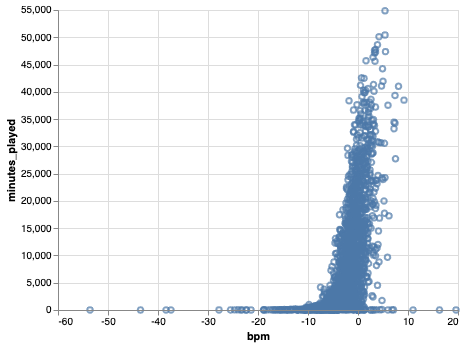

In [22]:
alt.Chart(df).mark_point().encode(
    alt.X("bpm"),
    alt.Y("minutes_played"))

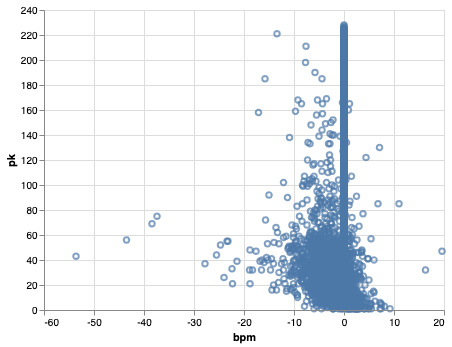

In [23]:
alt.Chart(df).mark_point().encode(
    alt.X("bpm"),
    alt.Y("pk"))